<a href="https://colab.research.google.com/github/arara90/Python-Machine-learning/blob/master/%ED%95%98%EB%8A%98/190405/ConfusionMatrics_Exercise_Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [0]:
dataset = pd.read_csv("Temp.csv")

In [0]:
dataset.head()

,Day,Weather,Temperature,Humidity,Wind,Play?
0,1,Sunny,Hot,High,Weak,No
1,2,Cloudy,Hot,High,Weak,Yes
2,3,Sunny,Mild,Normal,Strong,Yes
3,4,Cloudy,Mild,High,Strong,Yes
4,5,Rainy,Mild,High,Strong,No


In [0]:
#******************************************* [0]??
# dataset values(string)를 int 형식으로 변환

dataset['Day'] = pd.factorize(dataset.Day)[0]
dataset['Weather'] = pd.factorize(dataset.Weather)[0]
dataset['Temperature'] = pd.factorize(dataset.Temperature)[0]
dataset['Humidity'] = pd.factorize(dataset.Humidity)[0]
dataset['Wind'] = pd.factorize(dataset.Wind)[0]

In [0]:
dataset

,Day,Weather,Temperature,Humidity,Wind,Play?
0,0,0,0,0,0,No
1,1,1,0,0,0,Yes
2,2,0,1,1,1,Yes
3,3,1,1,0,1,Yes
4,4,2,1,0,1,No
5,5,2,2,1,1,No
6,6,2,1,0,0,Yes
7,7,0,0,0,1,No
8,8,1,0,1,0,Yes
9,9,2,1,0,1,No


In [0]:
# data, target 설정

x = dataset[['Day', 'Weather', 'Temperature', 'Humidity', 'Wind']]
y = dataset['Play?']

In [0]:
# train, test set설정

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
# trainning

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# prediction

rResult = LR.predict(xtest)

##confusion_matrix

* Scikit-Learn 에서 지원하는 분류 성능평가 명령
* 분류 결과표(Confusion Matrix)는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과
* 원래 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.


In [0]:
# confusion_matrix

from sklearn import metrics

metrics.confusion_matrix(ytest, rResult)

array([[0, 0],
       [2, 0]])

In [0]:
# confusion_matrix를 그래프로 보자

# scikit-plot library 설치

# !pip install scikit-plot

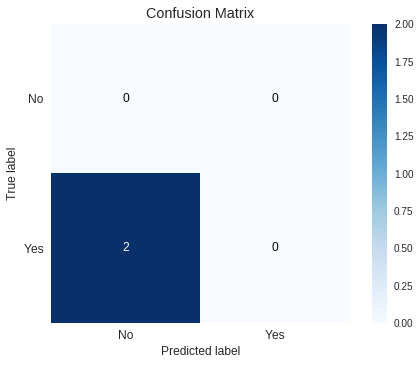

In [0]:
# confusion_matrix 그래프로 나타내기

import matplotlib.pyplot as plt
import scikitplot as skplot

skplot.metrics.plot_confusion_matrix(ytest, rResult)